In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:

# Загрузка данных
data = pd.read_csv('data_merged.csv')

In [5]:
data_cropped = data.drop(['Unnamed: 0', 'Npair', 'Nm1', 'Nm2'], axis = 1)
data_cropped.to_csv('data.csv')

In [2]:
display(data.head())
display(data.tail())

,Unnamed: 0,Npair,Nm1,Bm1_N,Bm1_S,Fm1_B,Nm2,Bm2_N,Bm2_S,Fm2_B,Bpair_N,Bpair_S,Fpair_N,Fpair_S
0,1,2,11,234,233,5.94,17,233,236,5.96,343,345,11.897638,11.897638
1,2,3,102,237,221,5.88,108,220,236,5.83,342,341,11.740157,11.740157
2,3,4,105,234,230,5.93,121,231,234,5.91,342,342,11.858268,11.858268
3,4,5,107,241,222,5.91,100,221,242,5.91,347,349,11.850394,11.850394
4,5,6,109,235,229,5.93,118,220,233,5.80,339,340,11.748031,11.748031


,Unnamed: 0,Npair,Nm1,Bm1_N,Bm1_S,Fm1_B,Nm2,Bm2_N,Bm2_S,Fm2_B,Bpair_N,Bpair_S,Fpair_N,Fpair_S
228,242,288,95,235,228,5.91,485,227,235,5.87,341,341,11.811024,11.811024
229,243,289,96,233,230,5.91,117,233,234,5.94,342,341,11.881890,11.881890
230,244,290,97,241,220,5.92,394,221,240,5.91,347,346,11.866142,11.866142
231,245,291,98,248,219,5.89,1866,213,245,5.91,352,351,11.826772,11.842520
232,246,292,99,233,232,5.91,111,230,232,5.91,341,341,11.858268,11.858268


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  233 non-null    int64  
 1   Npair       233 non-null    int64  
 2   Nm1         233 non-null    int64  
 3   Bm1_N       233 non-null    int64  
 4   Bm1_S       233 non-null    int64  
 5   Fm1_B       233 non-null    float64
 6   Nm2         233 non-null    int64  
 7   Bm2_N       233 non-null    int64  
 8   Bm2_S       233 non-null    int64  
 9   Fm2_B       233 non-null    float64
 10  Bpair_N     233 non-null    int64  
 11  Bpair_S     233 non-null    int64  
 12  Fpair_N     233 non-null    float64
 13  Fpair_S     233 non-null    float64
dtypes: float64(4), int64(10)
memory usage: 25.6 KB


In [7]:
display(data.isna().sum())

Unnamed: 0    0
Npair         0
Nm1           0
Bm1_N         0
Bm1_S         0
Fm1_B         0
Nm2           0
Bm2_N         0
Bm2_S         0
Fm2_B         0
Bpair_N       0
Bpair_S       0
Fpair_N       0
Fpair_S       0
dtype: int64

In [9]:
display(data[['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B', 'Bpair_S', 'Fpair_N', 'Fpair_S']].describe())

,Bm1_N,Bm1_S,Fm1_B,Bm2_N,Bm2_S,Fm2_B,Bpair_S,Fpair_N,Fpair_S
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.00000,233.000000,233.000000
mean,237.545064,223.862661,5.893777,223.270386,238.034335,5.892103,343.88412,11.819440,11.821378
std,4.649702,6.519733,0.048231,6.329313,7.996154,0.051061,3.41136,0.061165,0.060877
min,229.000000,209.000000,5.750000,210.000000,225.000000,5.730000,337.00000,11.685039,11.685039
25%,234.000000,219.000000,5.860000,219.000000,234.000000,5.860000,341.00000,11.771654,11.771654
50%,237.000000,224.000000,5.890000,223.000000,238.000000,5.900000,344.00000,11.811024,11.811024
75%,241.000000,229.000000,5.930000,229.000000,241.000000,5.930000,346.00000,11.860000,11.866142
max,251.000000,241.000000,6.010000,238.000000,336.000000,6.070000,354.00000,11.960630,11.970000


In [10]:
data[data['Bm2_S']>300]

,Bm1_N,Bm1_S,Fm1_B,Bm2_N,Bm2_S,Fm2_B,Bpair_N,Bpair_S,Fpair_N,Fpair_S
75,233,229,5.89,223,336,5.84,338,342,11.732283,11.732283


In [2]:
display(data[['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B', 'Bpair_S', 'Fpair_N', 'Fpair_S']].median())

Bm1_N      237.000000
Bm1_S      224.000000
Fm1_B        5.890000
Bm2_N      223.000000
Bm2_S      238.000000
Fm2_B        5.900000
Bpair_S    344.000000
Fpair_N     11.811024
Fpair_S     11.811024
dtype: float64

In [ ]:
# Загрузка данных
data = pd.read_csv('data.csv', index_col=0)

# Целевые переменные (зависимые)
targets = ['Bpair_N', 'Bpair_S', 'Fpair_N', 'Fpair_S']

# Признаки (независимые)
features = ['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']


,Bm1_N,Bm1_S,Fm1_B,Bm2_N,Bm2_S,Fm2_B,Bpair_N,Bpair_S,Fpair_N,Fpair_S
75,233,229,5.89,223,336,5.84,338,342,11.732283,11.732283


In [17]:

data.drop(75, inplace = True)
data[data['Bm2_S']>300]

,Bm1_N,Bm1_S,Fm1_B,Bm2_N,Bm2_S,Fm2_B,Bpair_N,Bpair_S,Fpair_N,Fpair_S


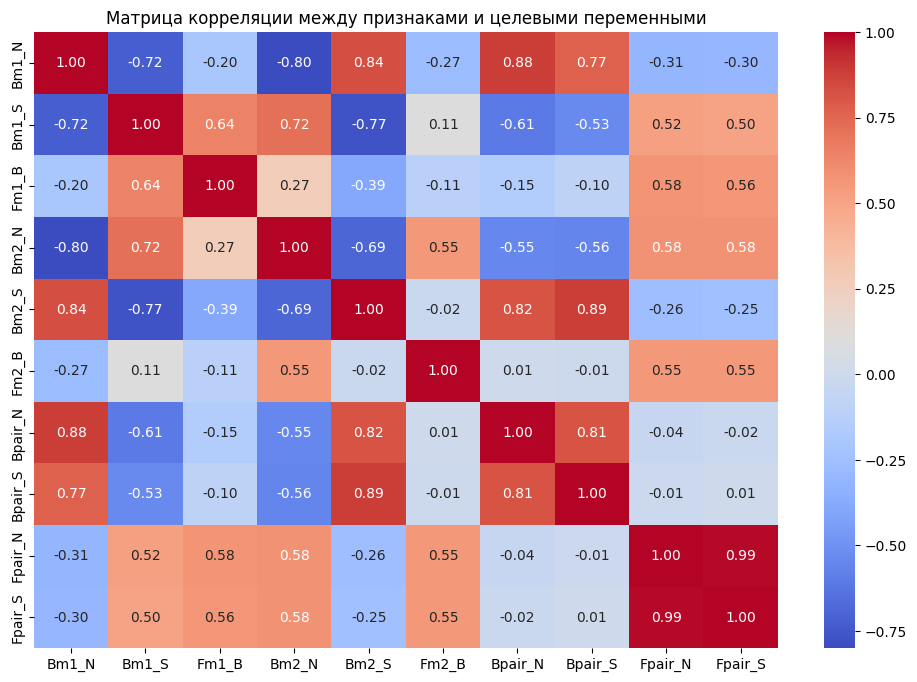

In [18]:
# 1. Матрица корреляции
corr_matrix = data[features + targets].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции между признаками и целевыми переменными")
plt.show()



In [43]:
# Целевые переменные (зависимые)
targets = ['Bpair_N', 'Bpair_S', 'Fpair_N', 'Fpair_S']

# Признаки (независимые)
features = ['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']

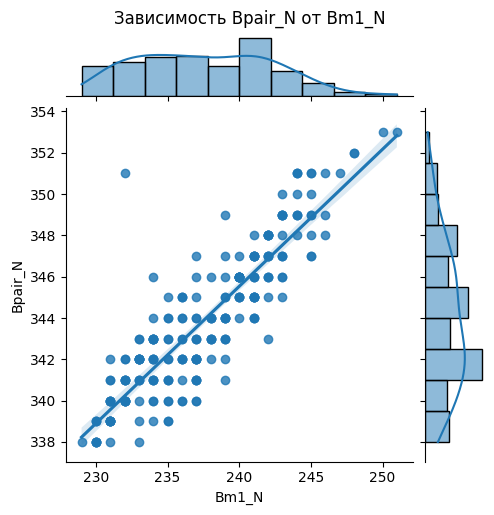

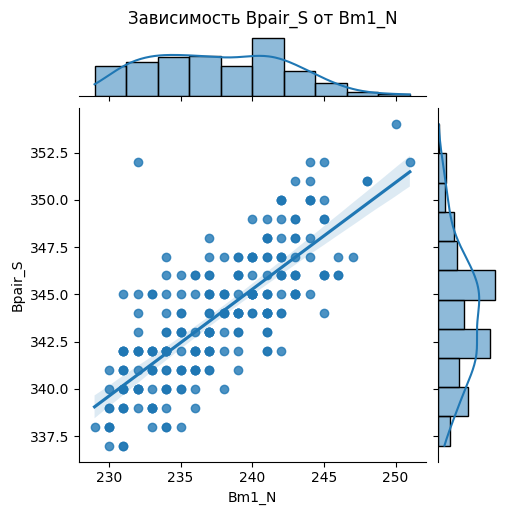

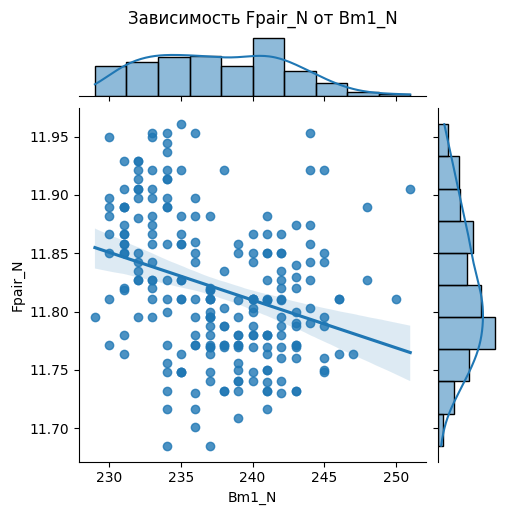

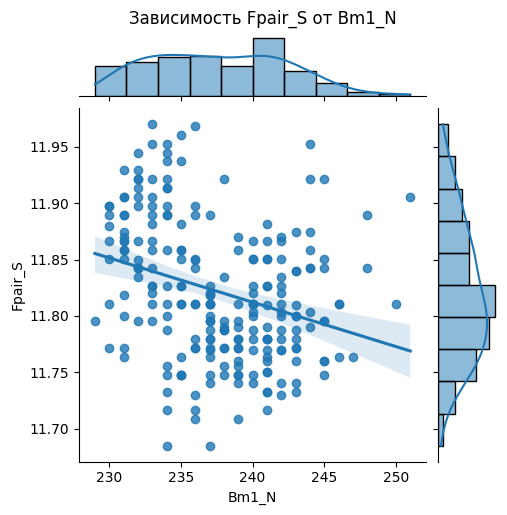

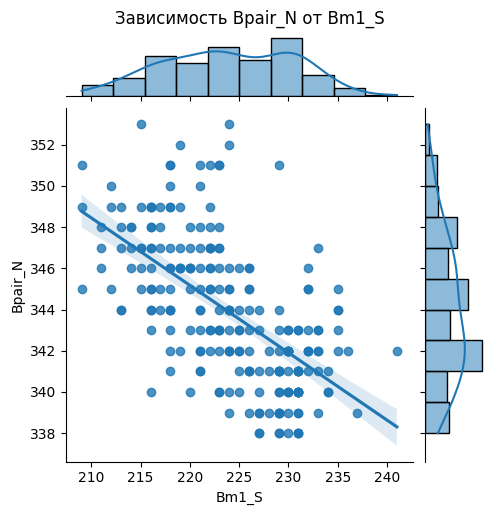

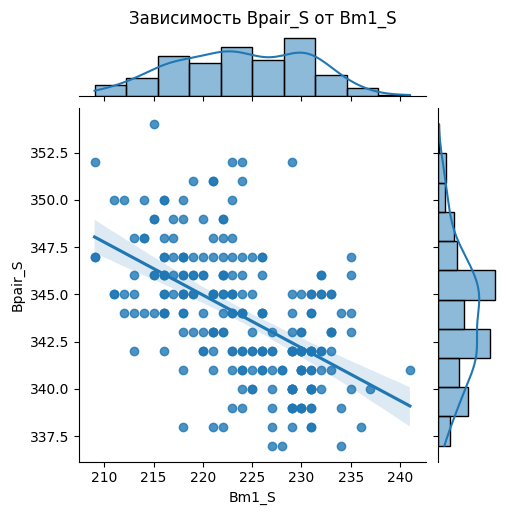

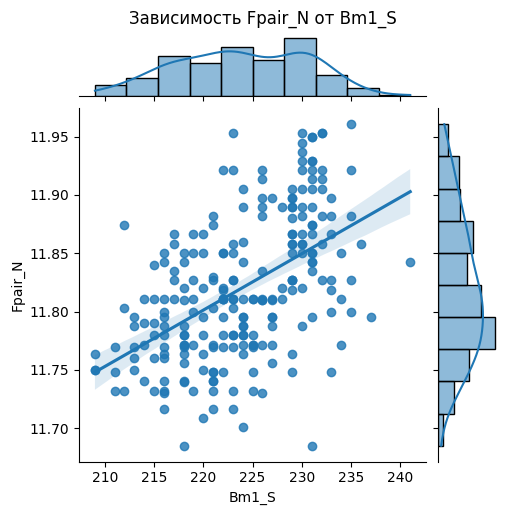

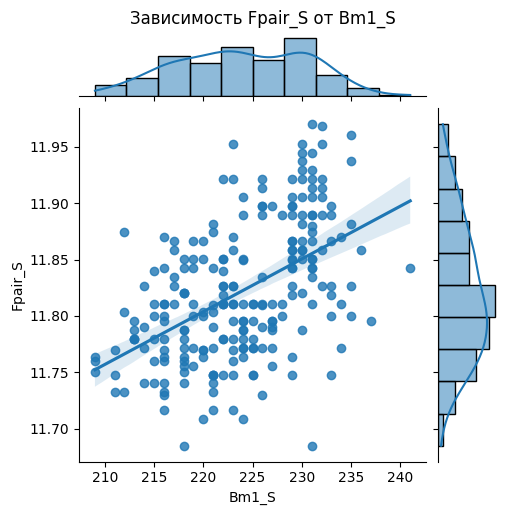

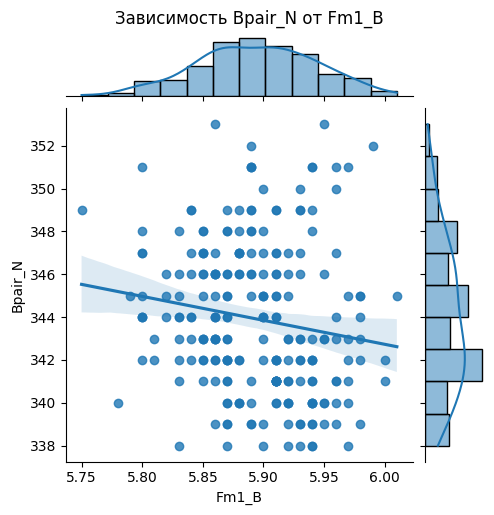

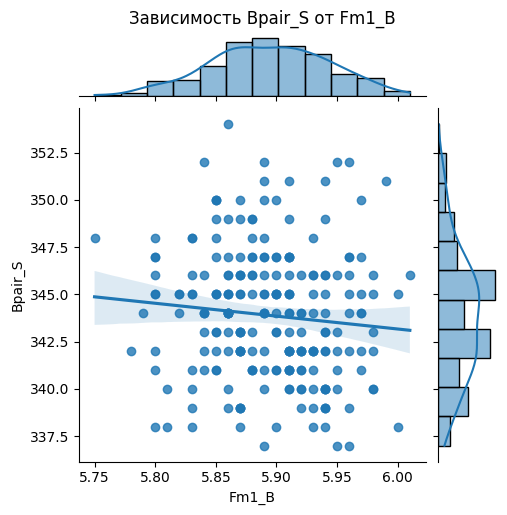

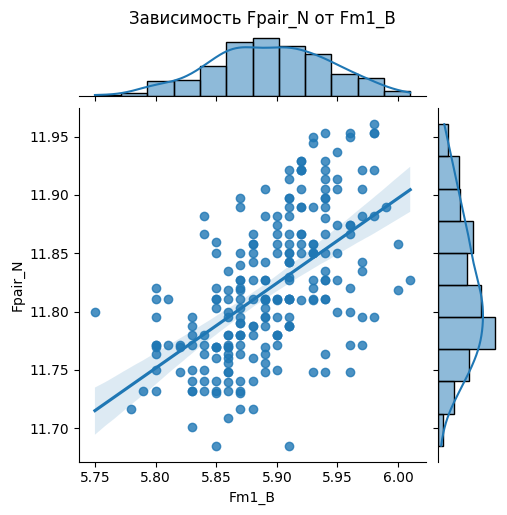

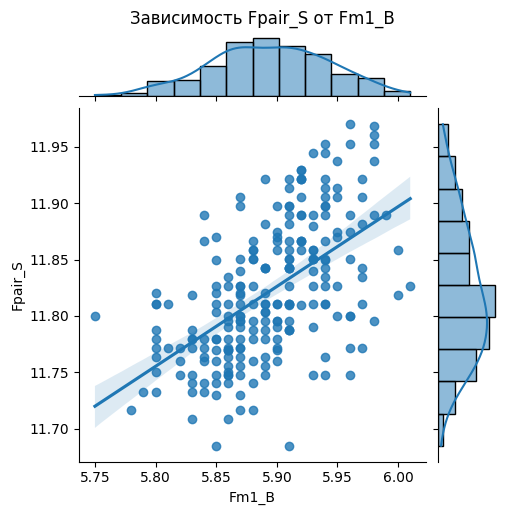

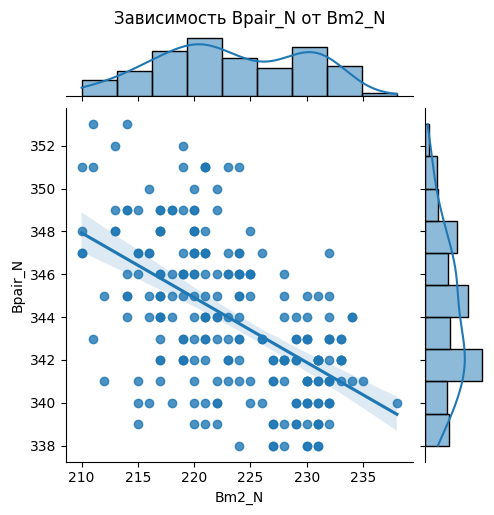

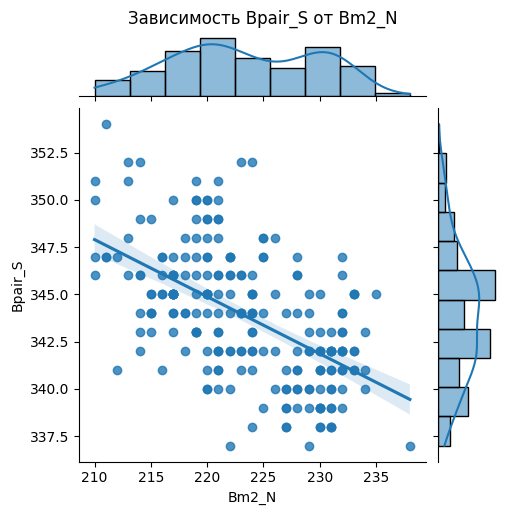

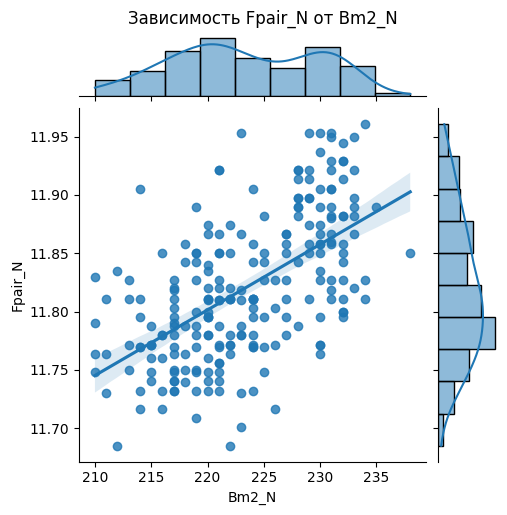

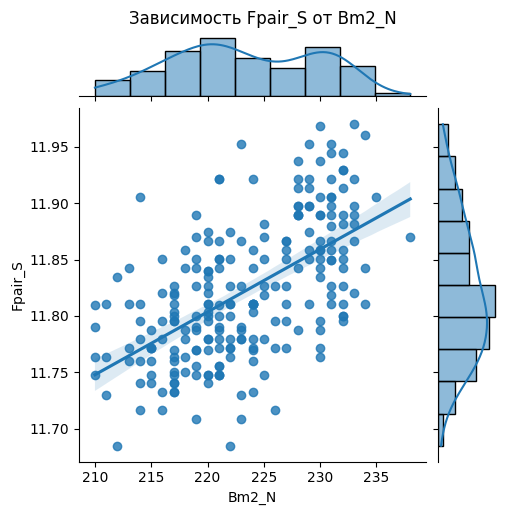

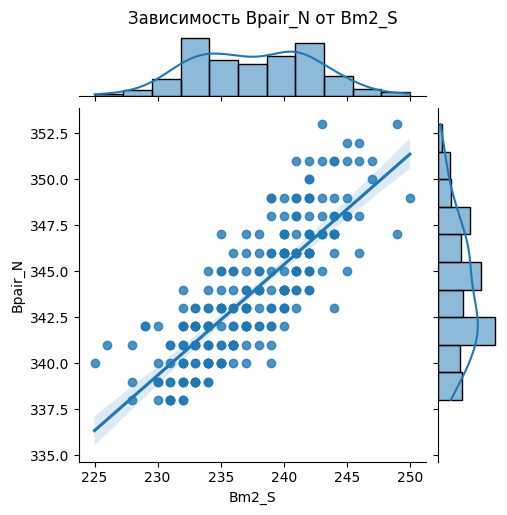

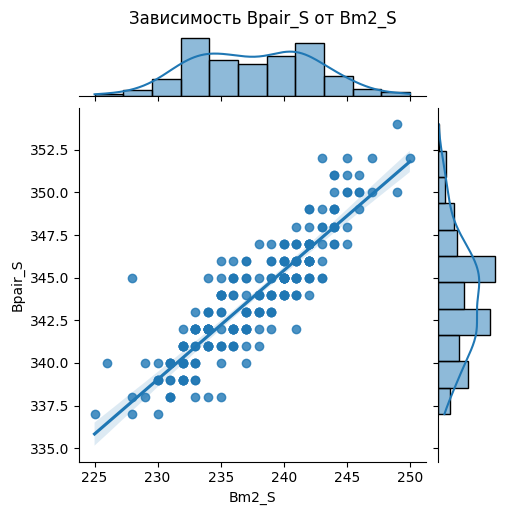

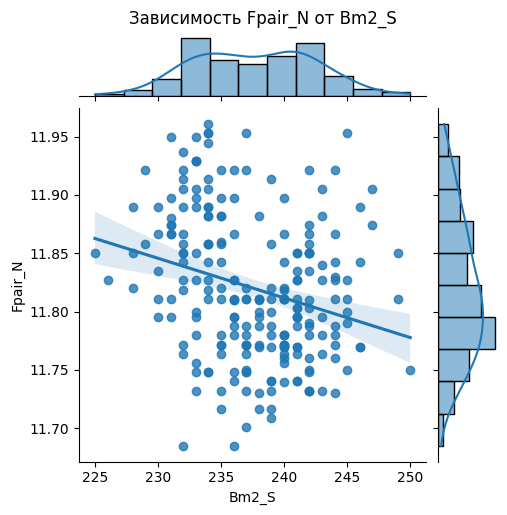

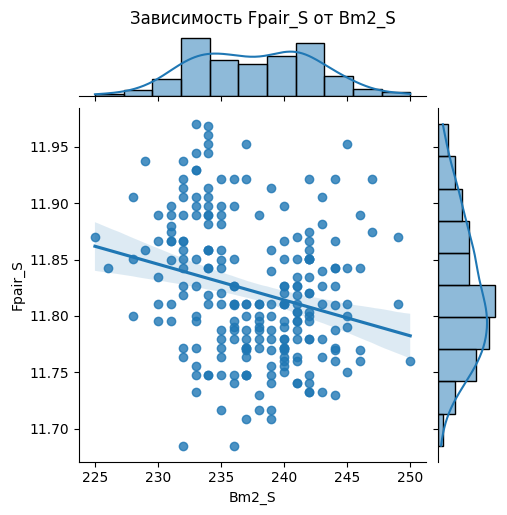

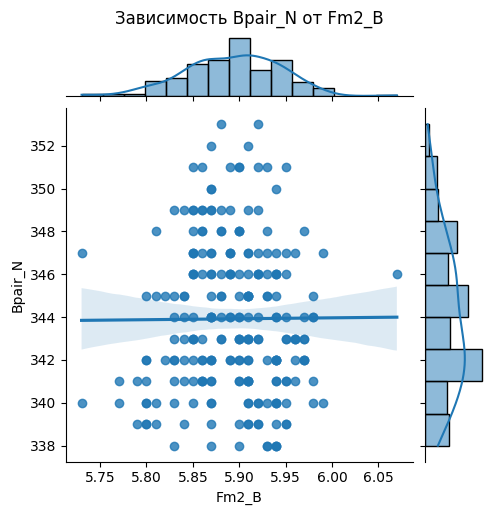

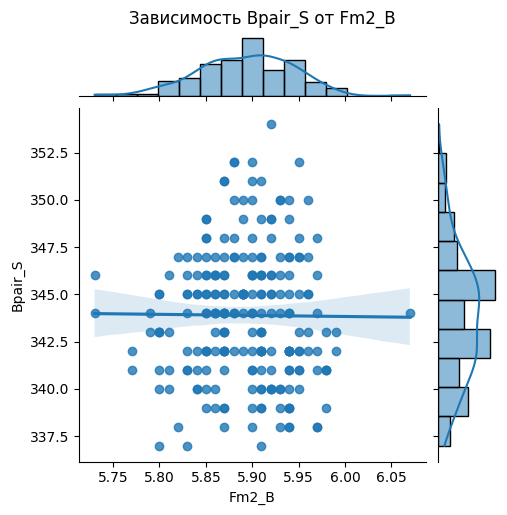

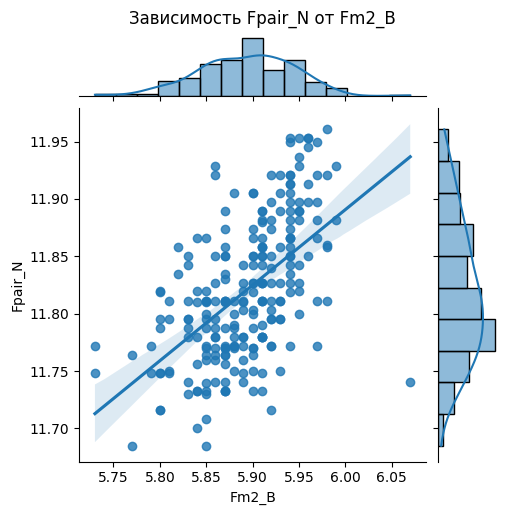

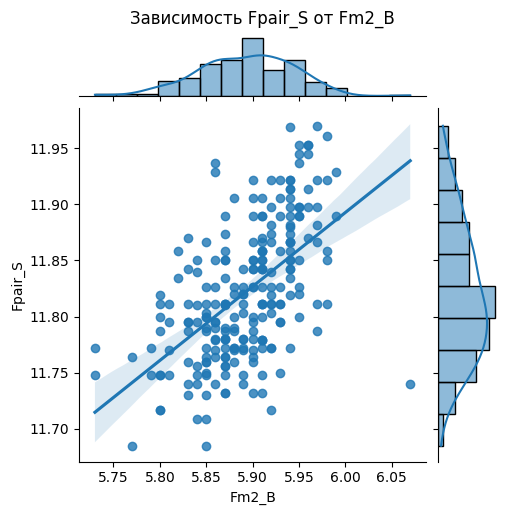

In [44]:
# 2. Парные графики (scatter plots)
for feature in features:
    for target in targets:
        sns.jointplot(x=feature, y=target, data=data, kind='reg', height=5)
        plt.suptitle(f"Зависимость {target} от {feature}", y=1.02)
        plt.show()

# Целевые переменные (зависимые)
targets = ['Bpair_N', 'Bpair_S', 'Fpair_N', 'Fpair_S']

# Признаки (независимые)
features = ['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']

In [38]:
# 3 Регрессионный анализ общий
features = ['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']
targets = ['Bpair_N', 'Bpair_S', 'Fpair_N', 'Fpair_S']
X = data[features]
y = data[target]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"R² для {target}: {r2_score(y, y_pred):.3f}")
print("Коэффициенты модели:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.3f}")

R² для Bpair_N: 0.877
Коэффициенты модели:
Bm1_N: 0.735
Bm1_S: -0.001
Fm1_B: 4.564
Bm2_N: 0.193
Bm2_S: 0.195
Fm2_B: 6.364


In [37]:
# 3.1 Регрессионный анализ (на примере одной целевой переменной)
features = ['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']
target = 'Bpair_N'
X = data[features]
y = data[target]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"R² для {target}: {r2_score(y, y_pred):.3f}")
print("Коэффициенты модели:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.3f}")

R² для Bpair_N: 0.877
Коэффициенты модели:
Bm1_N: 0.735
Bm1_S: -0.001
Fm1_B: 4.564
Bm2_N: 0.193
Bm2_S: 0.195
Fm2_B: 6.364


In [34]:
# 3.2
features = ['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']
target = 'Bpair_S'
X = data[features]
y = data[target]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"R² для {target}: {r2_score(y, y_pred):.3f}")
print("Коэффициенты модели:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.3f}")

R² для Bpair_S: 0.872
Коэффициенты модели:
Bm1_N: 0.081
Bm1_S: 0.085
Fm1_B: 15.124
Bm2_N: 0.046
Bm2_S: 0.766
Fm2_B: 0.194


In [ ]:
# 3.3 Регрессионный анализ (на примере одной целевой переменной)
features = ['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']
target = 'Fpair_N'
X = data[features]
y = data[target]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"R² для {target}: {r2_score(y, y_pred):.3f}")
print("Коэффициенты модели:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.3f}")

R² для Fpair_N: 0.738
Коэффициенты модели:
Bm1_S: 0.000
Fm1_B: 0.787
Bm2_N: 0.003
Bm2_S: 0.003
Fm2_B: 0.554


In [ ]:
# 3.4 Регрессионный анализ (на примере одной целевой переменной)
features = ['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']
target = 'Fpair_S'
X = data[features]
y = data[target]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"R² для {target}: {r2_score(y, y_pred):.3f}")
print("Коэффициенты модели:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.3f}")

R² для Fpair_S: 0.730
Коэффициенты модели:
Bm1_N: 0.001
Bm1_S: 0.000
Fm1_B: 0.748
Bm2_N: 0.003
Bm2_S: 0.002
Fm2_B: 0.539


In [ ]:
# 3.4 Регрессионный анализ общий
features = ['Bm1_N', 'Bm1_S', 'Fm1_B', 'Bm2_N', 'Bm2_S', 'Fm2_B']
target = 'Fpair_S'
X = data[features]
y = data[target]

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print(f"R² для {target}: {r2_score(y, y_pred):.3f}")
print("Коэффициенты модели:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.3f}")